# SBA Loan Approval Analysis

## by Justin Sierchio

In this analysis, we will be looking at loan approvals by the U.S. Small Business Administration. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>What types of businesses receive more SBA Loans than others?</li>
    <li>Where geographically do SBA Loans get approved?</li>
    <li>What are some hypothesis and conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied?select=SBAnational.csv. More information related to the dataset can be found at: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied?select=Should+This+Loan+be+Approved+or+Denied+A+Large+Dataset+with+Class+Assignment+Guidelines.pdf.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_SBA = pd.read_csv("SBAnational.csv");

print('Datasets uploaded!');

C:\Users\jmsie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Datasets uploaded!


In [3]:
# Display 1st 5 rows from SBA dataset
df_SBA.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


Let us describe what the most important columns mean.

<ul>
    <li>LoanNr_ChkDgt : Identification Number for the Loan </li>
    <li>Name: Name of the business</li>
    <li>City, State, ZIP: Self-Explanatory</li>
    <li>Bank: Bank that distributed the loan </li>
    <li>BankState: Self-Explanatory</li>
    <li>NAICS: Business Classification Code</li>
    <li>ApprovalDate: Self-Explanatory</li>
    <li>ApprovalFY: Fiscal Year of Loan Approval</li>
    <li>Term: How long the loan is valid for</li>
    <li>NoEmp: Whether the business has employees or not</li>
    <li>NewExist: Whether the business is new or existing</li>
    <li>CreateJob: Number of Created Jobs</li>
    <li>RetainedJob: Number of Retained Jobs</li>
    <li>FranchiseCode: The franchise code of the business (if applicable)</li>
    <li>UrbanRural: Is the business located in an urban or rural area</li>
    <li>LowDoc: Whether the loan application qualified for the LowDoc program</li>
    <li>RevLineCr: Does the business have a revolving line of credit</li>
    <li>DisbursementDate: The date the money was dispersed</li>
    <li>DisbursementGross: How much money was dispersed</li>
    <li>BalanceGross: How much of the loan needs to be repaid?</li>
    <li>GrAppv: How much the granting bank approved the business for</li>
    <li>SBA_Appv: How much the SBA approved the business for</li>

## Data Cleaning

Now let's clean some of the data for our analysis. Let's establish an initial impression as to the quality of the dataset.

In [4]:
# Characteristics of the SBA Loan dataset
df_SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

It appears that the 'ChgOffDate' is not particularly useful, so let's drop that from the dataset.

In [5]:
# Drop Institution Name from the SBA Loan Dataset
df_SBA2 = df_SBA.drop(['ChgOffDate'], axis=1)
df_SBA2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

Now let's find out how many nulls we have remaining in the dataset.

In [6]:
# Find 'NULL' values in SBA Loan Dataset
df_SBA2.isnull().sum()

LoanNr_ChkDgt           0
Name                   14
City                   30
State                  14
Zip                     0
Bank                 1559
BankState            1566
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              136
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4528
LowDoc               2582
DisbursementDate     2368
DisbursementGross       0
BalanceGross            0
MIS_Status           1997
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

The number of null values appears to be quite small compared to the overall dataset size, so let's drop the 'NULL' rows.

In [7]:
# Remove 'NULL' rows from SBA Loans Dataset
df_SBA3 = df_SBA2.dropna()

# Confirm all 'NULL' rows and columns removed
df_SBA3.isnull().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

Now it appears that our dataset is sufficiently cleaned and ready for exploratory analysis.

## Exploratory Data Analysis

To begin this analysis, let's get an idea of how many SBA loans have been issued over time.

In [8]:
# Determine distribution of SBA Loan Approval Years
df_SBA3['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

Let's make sure all these years are the same datatype, as well as convert '1976A' to '1976'.

In [9]:
# Convert '1976A' to '1976'
df_SBA3['ApprovalFY'].replace("1976A", 1976, inplace=True)

# Convert all values in 'ApprovedFY' to string
df_SBA3['ApprovalFY'] = df_SBA3['ApprovalFY'].astype(str)

C:\Users\jmsie\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-9-d308279bc728>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SBA3['ApprovalFY'] = df_SBA3['ApprovalFY'].astype(str)


Text(0, 0.5, '# of Approved Loans')

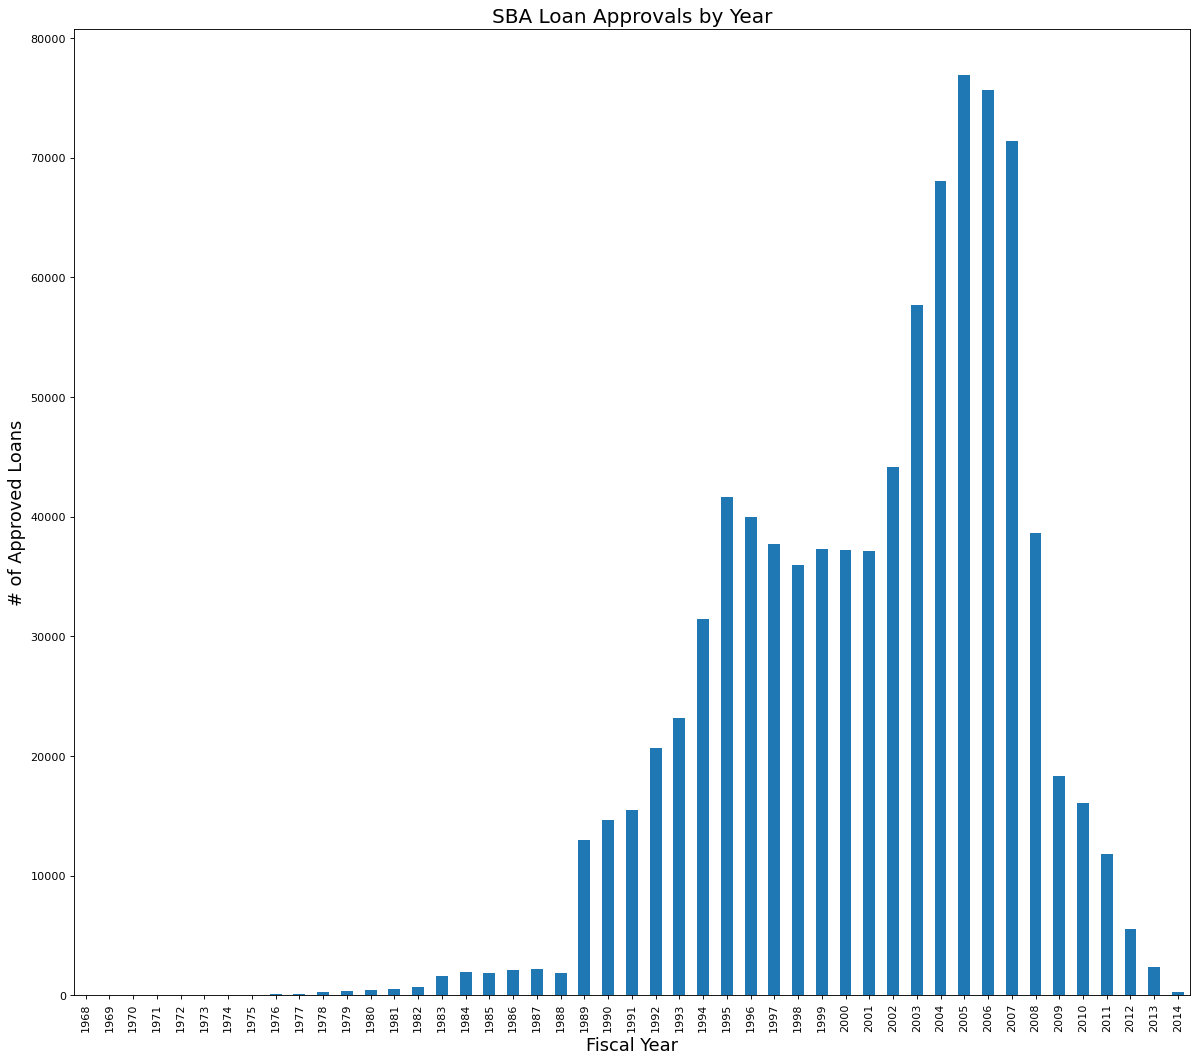

In [10]:
# Plot SBA Loan Approvals by Fiscal Year
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

df_SBA3["ApprovalFY"].groupby(df_SBA3["ApprovalFY"]).count().plot(kind="bar")
plt.title('SBA Loan Approvals by Year', fontsize = 18)
plt.xlabel('Fiscal Year', fontsize = 16)
plt.ylabel('# of Approved Loans', fontsize = 16)

As we can see the greatest concentration of SBA Loan approvals occurred in 2004 to 2007, right before the Great Financial Crisis. After 2008, the rate of SBA Loan approvals plummeted.

From online research, we can see that NAICS is the North American Industrial Classification System, which is a code routine that the US Small Business Administration uses to classify different types of businesses. Let us see which NAICS codes have the highest SBA loan approval rate.

In [11]:
# Find the top SBA Loan Approvals by NAICS Code
df_SBA3_NAICS = df_SBA3['NAICS'];
df_SBA3_NAICS.value_counts().head(11)

0         198267
722110     27772
722211     19338
811111     14392
621210     13856
624410      9999
812112      9144
561730      8789
621310      8627
812320      7813
541110      6975
Name: NAICS, dtype: int64

Using NAICS code lookup tools, we find that these codes correspond to the following types of busineses:

<ul>
    <li>722110: Hotels (except Casino Hotels) and Motels</li>
    <li>722111: Limited-Service Restaurants</li>
    <li>811111: General Automotive Repair</li>
    <li>621210: Offices of Dentists</li>
    <li>624410: Child Care Day Services</li>
    <li>812112: Beauty Salons</li>
    <li>561730: Landscaping Services</li>
    <li>621310: Offices of Chiropractors</li>
    <li>812320: Drycleaning and Laundry Services (except coin operated)</li>
    <li>541110: Offices of Lawyers</li>
    
Source: https://secure.industriuscfo.com/industry-metrics/naics/

In [12]:
# Find the top SBA Loan Approvals by Urban Rural
df_SBA3_UrbanRural = df_SBA3['UrbanRural'];
df_SBA3_UrbanRural.value_counts().head(11)

1    465149
0    317016
2    104075
Name: UrbanRural, dtype: int64

From what we can gather, 1 = urban, 0 = rural and 2 = undefined. Let's plot this information.

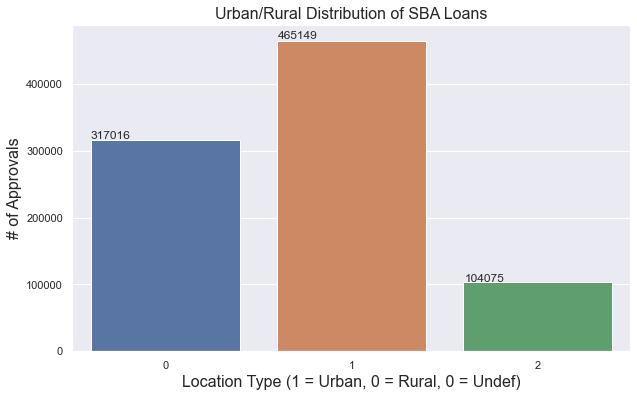

In [13]:
# Find the urban vs. rural distribution of SBA Loan Approvals

# Generate the Plot
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set(style="darkgrid", font_scale = 1)

# Fill in the Plot
ax = sns.countplot(x="UrbanRural", data=df_SBA3)

# Set the Title and Axes
ax.set_title('Urban/Rural Distribution of SBA Loans', fontsize = 16)
ax.set_ylabel('# of Approvals', fontsize = 16)
ax.set_xlabel('Location Type (1 = Urban, 0 = Rural, 0 = Undef)', fontsize = 16)

# Annotate the plot with the # of animal intakes
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 12)

As one might have guessed (due to population distribution), the majority of SBA loans are approved to urban applicants.

Now let us investigate the distribution of loans for new vs. existing businesses.

In [14]:
# Find the top SBA Loan Approvals by New or Existing Businesses
df_SBA3_NewExist = df_SBA3['NewExist'];
df_SBA3_NewExist.value_counts().head(11)

1.0    636139
2.0    249080
0.0      1021
Name: NewExist, dtype: int64

From what we can gather, 1 = new, 2 = existing and 0 = undefined. Let's plot this information.

Text(0.5, 0, 'Business Type')

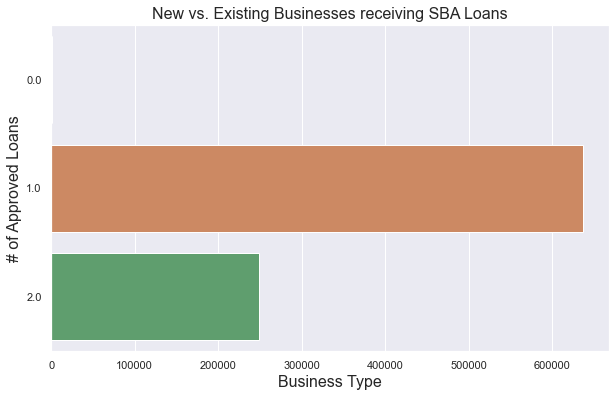

In [15]:
# Plot the distribution of new vs. existing businesses receiving SBA Loans

# Generate the Plot
fig = plt.gcf()
fig.set_size_inches(10, 6)
sns.set(style="darkgrid", font_scale = 1)

# Fill in the Plot
ax = sns.countplot(y="NewExist", data=df_SBA3)

# Set the Title and Axes
ax.set_title('New vs. Existing Businesses receiving SBA Loans', fontsize = 16)
ax.set_ylabel('# of Approved Loans', fontsize = 16)
ax.set_xlabel('Business Type', fontsize = 16)

As we can see, the majority of businesses that receive SBA loans are new businesses. Possible reasons for that include (a) the government mandate to assist in small business creation and (b) bank reluctance to loan money out to new businesses with uncertain credit history.

To wrap up this section, let's look at the top 10 locales for SBA Loan approvals.

In [16]:
# Find the top 10 Cities for SBA loan approvals
df_SBA3_Locale = df_SBA3['City'];
print('Top 10 Locales with SBA Loan Approvals:\n')
print('Locale Name   # of Loan Approvals')
print(df_SBA3_Locale.value_counts().head(10))

Top 10 Locales with SBA Loan Approvals:

Locale Name   # of Loan Approvals
LOS ANGELES    11467
HOUSTON        10129
NEW YORK        7758
CHICAGO         5936
MIAMI           5540
SAN DIEGO       5316
DALLAS          5017
PHOENIX         4446
LAS VEGAS       4336
BROOKLYN        3698
Name: City, dtype: int64


As we can see, the most SBA loan approvals occur in major metropolitan areas.